In [3]:
import platform
print('Python Version: ' + platform.python_version())
from pyspark.sql import SparkSession, types
from pyspark.sql.functions import to_timestamp, unix_timestamp, max as max_dttm
from pyspark.sql.types import *
spark = SparkSession.builder.appName('PySpark').getOrCreate()
print('Spark Version:  ' + spark.version)

Python Version: 3.7.1
Spark Version:  2.4.0


### Read in File, Add DTTM, Show Schema

In [4]:
df = spark.read.csv('Traffic_Crash_Reports__CPD_.csv', header=True, inferSchema=True)
df = df.withColumn('DTTMCRASHREPORTED',to_timestamp(df.DATECRASHREPORTED, 'MM/dd/yyyy HH:mm:ss'))
df.printSchema()

root
 |-- ADDRESS_X: string (nullable = true)
 |-- LATITUDE_X: double (nullable = true)
 |-- LONGITUDE_X: double (nullable = true)
 |-- AGE: string (nullable = true)
 |-- COMMUNITY_COUNCIL_NEIGHBORHOOD: string (nullable = true)
 |-- CPD_NEIGHBORHOOD: string (nullable = true)
 |-- CRASHDATE: string (nullable = true)
 |-- CRASHLOCATION: string (nullable = true)
 |-- CRASHSEVERITY: string (nullable = true)
 |-- CRASHSEVERITYID: integer (nullable = true)
 |-- DATECRASHREPORTED: string (nullable = true)
 |-- DAYOFWEEK: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- INJURIES: string (nullable = true)
 |-- INSTANCEID: string (nullable = true)
 |-- LIGHTCONDITIONSPRIMARY: string (nullable = true)
 |-- LOCALREPORTNO: string (nullable = true)
 |-- MANNEROFCRASH: string (nullable = true)
 |-- ROADCONDITIONSPRIMARY: string (nullable = true)
 |-- ROADCONTOUR: string (nullable = true)
 |-- ROADSURFACE: string (nullable = true)
 |-- SNA_NEIGHBORHOOD: string (nullable = true)
 |--

### Show Dimensions

In [21]:
print('Rows: ' + str(df.count()))
print('Cols: ' + str(len(df.columns)))

Rows: 194028
Cols: 26


### First and Last Date

In [20]:
first_date = df.agg({"DTTMCRASHREPORTED":"min"}).collect()[0][0]
print('First Date: ' + str(first_date))

last_date = df.agg({"DTTMCRASHREPORTED":"max"}).collect()[0][0]
print('Last Date: ' + str(last_date))

First Date: 2012-01-02 04:50:00
Last Date: 2018-12-31 12:47:00


### Year Operations

In [39]:
from pyspark.sql.functions import year, countDistinct

# get total years from main data frame

total_years = df.agg(countDistinct(year('DTTMCRASHREPORTED'))).na.drop().collect()[0][0]
print('Total Years: ' + str(total_years))

per_year = df.select(year('DTTMCRASHREPORTED').alias('year')).groupBy('year').count().orderBy('year').na.drop()
per_year.show()

# get total years if you pull out a seperate dataframe
total_years = per_year.count()
print('Total Years: ' + str(total_years))


Total Years: 7
+----+-----+
|year|count|
+----+-----+
|2012| 1963|
|2013|24201|
|2014|25775|
|2015|34010|
|2016|37613|
|2017|35386|
|2018|35023|
+----+-----+

Total Years: 7


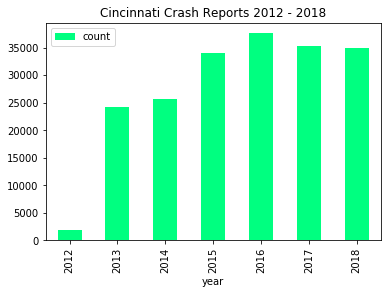

In [37]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

per_year = df.select(year('DTTMCRASHREPORTED').alias('year')).groupBy('year').count().orderBy('year', ascending=True).na.drop()

per_year_pandas_df = per_year.toPandas()
per_year_pandas_df.plot(kind='bar',x='year',y='count',colormap='winter_r', title='Cincinnati Crash Reports 2012 - 2018')